# Cartoonifying Images and Videos
### Complete # TODO

# Requirements

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
import os

# Cartoonify Function

In [4]:
def cartoonify(image):
    # Check if the image is loaded correctly
    if image is None:
        print("Error: Image not loaded properly.")
        return None

    # Convert the image to grayscale
    grayScaleImage = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Apply median blur to the grayscale image
    smoothGrayScale = cv2.medianBlur(grayScaleImage, 5)

    # Use adaptive thresholding to detect edges in the image
    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                    cv2.THRESH_BINARY, 9, 9)

    # Apply bilateral filter to the original image to smooth colors
    colorImage = cv2.bilateralFilter(image, 9, 300, 300)

    # Combine the edge mask with the color image to create a cartoon effect
    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge)

    # Return the cartoonified image
    return cartoonImage



# Cartoonifying Images

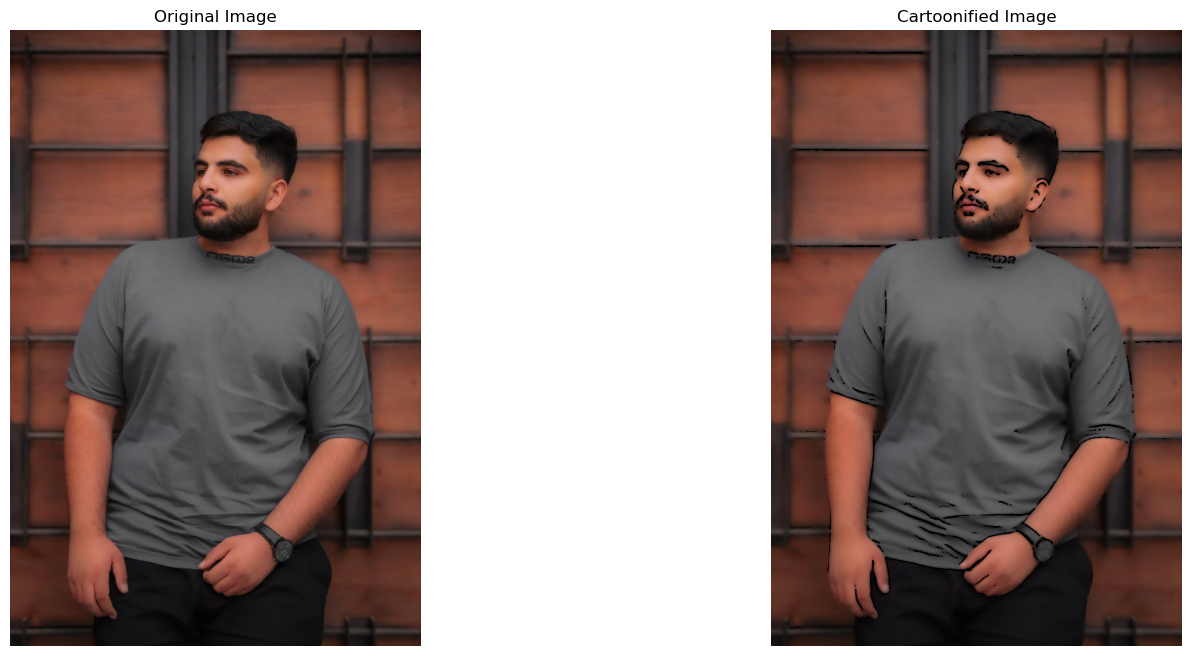

In [5]:
# Define the path to the image file using os.path.join
image_path = os.path.join("images", "my_image.jpg")

# Read the input image
image = cv2.imread(image_path)

# Check if the image is loaded correctly
if image is None:
    print("Error: Image not loaded properly.")
else:
    # Convert the image from BGR (OpenCV default) to RGB (Matplotlib default)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply the cartoonify function to the image
    result = cartoonify(image)

    # Convert the result image from BGR to RGB for display
    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

    # Create a figure to display the images
    plt.figure(figsize=(18, 8))

    # Display the original image
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")

    # Display the cartoonified image
    plt.subplot(1, 2, 2)
    plt.imshow(result_rgb)
    plt.title("Cartoonified Image")
    plt.axis("off")

    # Show the plot
    plt.show()


# Cartoonify Webcam Video Stream

In [6]:
def visualize_fps(image, fps: int):
    # Check if the image is grayscale or colored.
    # If it's grayscale, set the text color to white; if colored, set the text color to green.
    if len(np.shape(image)) < 3:
        text_color = (255, 255, 255)  # White color for grayscale images.
    else:
        text_color = (0, 255, 0)  # Green color for colored images.

    # Define the row size for the text placement.
    row_size = 20 
    # Define the left margin for the text placement.
    left_margin = 24 

    # Set the font size and thickness for the text.
    font_size = 1
    font_thickness = 2

    # Format the FPS value into a string for displaying.
    fps_text = "FPS = {:.1f}".format(fps)
    # Set the text location on the image.
    text_location = (left_margin, row_size)
    
    # Place the FPS text on the image.
    cv2.putText(
        image,
        fps_text,
        text_location,
        cv2.FONT_HERSHEY_PLAIN,
        font_size,
        text_color,
        font_thickness,
    )

    # Return the modified image with the FPS text.
    return image


In [7]:
# Constants for camera settings
CAMERA_DEVICE_ID = 0  # ID for the camera device
IMAGE_WIDTH = 800  # Width of the captured image
IMAGE_HEIGHT = 600  # Height of the captured image
fps = 0  # Initial Frames Per Second (FPS) value

def cartoonify(image):
    # Placeholder for the cartoonify function implementation
    # You should define this function as per your previous code
    return image

def visualize_fps(image, fps: int):
    if len(np.shape(image)) < 3:
        text_color = (255, 255, 255)  # White color for grayscale images
    else:
        text_color = (0, 255, 0)  # Green color for colored images
    row_size = 20
    left_margin = 24
    font_size = 1
    font_thickness = 2
    fps_text = "FPS = {:.1f}".format(fps)
    text_location = (left_margin, row_size)
    
    # Place the FPS text on the image
    cv2.putText(
        image,
        fps_text,
        text_location,
        cv2.FONT_HERSHEY_PLAIN,
        font_size,
        text_color,
        font_thickness,
    )
    return image

if __name__ == "__main__":
    try:
        # Initialize video capture with the specified camera device ID
        cap = cv2.VideoCapture(CAMERA_DEVICE_ID)
        
        if not cap.isOpened():
            print("Error: Could not open video capture.")
            exit()
        
        # Set the resolution for the video capture
        cap.set(cv2.CAP_PROP_FRAME_WIDTH, IMAGE_WIDTH)
        cap.set(cv2.CAP_PROP_FRAME_HEIGHT, IMAGE_HEIGHT)

        while True:
            start_time = time.time()  # Record the start time to calculate FPS

            # Capture a single frame from the camera
            ret, frame = cap.read()
            if not ret:
                print("Error: Failed to capture frame.")
                break

            # Resize the frame to the specified dimensions
            frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))

            # Apply the cartoonify function to the frame
            frame = cartoonify(frame)

            # Display the frame with FPS overlay
            cv2.imshow("frame", visualize_fps(frame, fps))

            end_time = time.time()  # Record the end time to calculate FPS

            # Calculate the time taken to process the frame
            seconds = end_time - start_time

            # Calculate FPS based on the time taken to process the frame
            if seconds > 0:
                fps = 1 / seconds

            # Break the loop if the 'Esc' key (ASCII 27) is pressed
            if cv2.waitKey(33) == 27:
                break

    except Exception as e:
        print(e)  # Print the exception message
    finally:
        cv2.destroyAllWindows()  # Close all OpenCV windows
        cap.release()  # Release the camera resource


# Cartoonifying Videos

In [8]:
# Constants for video settings
CAMERA_DEVICE_ID = os.path.join("videos", "my_video.mp4")  # Path to the video file
IMAGE_WIDTH = 1000  # Width of the displayed image
IMAGE_HEIGHT = 600  # Height of the displayed image
fps = 0  # Initial Frames Per Second (FPS) value
FRAME_RATE = 30  # Desired frame rate
DURATION = 1 / FRAME_RATE  # Duration of each frame

def cartoonify(image):
    # Placeholder for the cartoonify function implementation
    # You should define this function as per your previous code
    return image

def visualize_fps(image, fps: int):
    # Check if the image is grayscale or colored.
    if len(np.shape(image)) < 3:
        text_color = (255, 255, 255)  # White color for grayscale images.
    else:
        text_color = (0, 255, 0)  # Green color for colored images.
    row_size = 20
    left_margin = 24
    font_size = 1
    font_thickness = 2
    fps_text = "FPS = {:.1f}".format(fps)
    text_location = (left_margin, row_size)

    # Place the FPS text on the image.
    cv2.putText(
        image,
        fps_text,
        text_location,
        cv2.FONT_HERSHEY_PLAIN,
        font_size,
        text_color,
        font_thickness,
    )
    return image

if __name__ == "__main__":
    try:
        # Initialize video capture with the specified video file path
        cap = cv2.VideoCapture(CAMERA_DEVICE_ID)

        if not cap.isOpened():
            print("Error: Could not open video file.")
            exit()

        while True:
            start_time = time.time()  # Record the start time to calculate FPS

            # Capture a single frame from the video
            ret, frame = cap.read()
            if not ret:
                print("Error: Failed to capture frame.")
                break

            # Resize the frame to the specified dimensions
            frame = cv2.resize(frame, (IMAGE_WIDTH, IMAGE_HEIGHT))

            # Apply the cartoonify function to the frame
            frame = cartoonify(frame)

            end_time = time.time()  # Record the end time to calculate FPS

            # Calculate the time taken to process the frame
            seconds = end_time - start_time

            # If the processing time is less than the desired frame duration, wait for the remaining time
            if seconds < DURATION:
                time.sleep(DURATION - seconds)

            # Recalculate the time taken to process the frame including sleep time
            seconds = end_time - start_time + (DURATION - seconds if seconds < DURATION else 0)

            # Calculate FPS based on the time taken to process the frame
            fps = 1 / seconds if seconds > 0 else 0

            # Display the frame with FPS overlay
            cv2.imshow("frame", visualize_fps(frame, fps))

            # Break the loop if the 'Esc' key (ASCII 27) is pressed
            if cv2.waitKey(33) == 27:
                break

    except Exception as e:
        print(e)  # Print the exception message
    finally:
        cv2.destroyAllWindows()  # Close all OpenCV windows
        cap.release()  # Release the video capture resource



### **گزارش مختصر پروژه: Cartoonify**

**عنوان پروژه**: تبدیل تصویر به استایل کارتونی (Cartoonify) با استفاده از تکنیک‌های پردازش تصویر.

**هدف پروژه**: هدف این پروژه اعمال استایل کارتونی بر روی تصاویر، ویدئوها و جریان ورودی از دوربین وب‌کم است. این کار با استفاده از تکنیک‌های پردازش تصویر مانند تبدیل به خاکی‌سایز، شفاف‌سازی و تشخیص لبه‌ها انجام می‌شود.

### **مراحل انجام پروژه**:

1. **درک مسئله**: 
   - در این پروژه، تصاویر یا ویدئوها به صورت ورودی دریافت می‌شوند و سپس تکنیک‌های پردازش تصویر برای اعمال استایل کارتونی به آن‌ها استفاده می‌شود.
   - نتیجه، تصاویری هستند که شبیه به کارتون‌ها به نظر می‌آیند.

2. **ورودی‌ها**:
   - تصاویر: یک تصویر از پوشه `images` با نام `my_image.jpg`.
   - ویدئوها: یک ویدئو از پوشه `videos` با نام `my_video.mp4`.
   - وب‌کم: امکان اعمال استایل کارتونی بر روی تصاویر و ویدئوهای گرفته شده از دوربین وب‌کم.

3. **مراحل پردازش تصویر**:
   - **تبدیل به خاکی‌سایز**: تصویر اولیه به صورت خاکی‌سایز تبدیل می‌شود.
   - **بلور میانه**: یک فیلتر بلور میانه برای از بین بردن نویز‌های تصادفی اعمال می‌شود.
   - **تشخیص لبه‌ها**: از روش‌های آستانه‌گذاری تطبیقی برای تشخیص لبه‌ها استفاده می‌شود.
   - **فیلتر بیلاترال**: یک فیلتر بیلاترال برای نرم‌سازی رنگ‌ها بر روی تصویر اعمال می‌شود.
   - **ترکیب لبه‌ها و رنگ‌ها**: لبه‌ها با تصویر رنگی ترکیب می‌شوند تا استایل کارتونی ایجاد شود.

4. **تست بر روی منابع مختلف**:
   - اعمال استایل کارتونی بر روی یک تصویر ثابت.
   - اعمال استایل کارتونی بر روی یک ویدئو.
   - اعمال استایل کارتونی در زمان واقعی با استفاده از دوربین وب‌کم.

5. **نتیجه نهایی**:
   - نتیجه، تصاویری یا ویدئوهایی هستند که با استفاده از تکنیک‌های پردازش تصویر به شکلی کارتونی درآمده‌اند.
   - این تکنیک‌ها موجب ایجاد تصاویری شبیه به انیمیشن‌های دو بعدی می‌شود.

### **نتیجه‌گیری**:
این پروژه موفق شد تا استایل کارتونی را به تصاویر و ویدئوها اعمال کند. این تکنیک‌های پردازش تصویر کاربردهای زیادی در زمینه‌های مختلف مانند تولید محتوا، فیلم‌سازی، و طراحی گرافیک دارند. استفاده از وب‌کم برای اعمال استایل کارتونی در زمان واقعی نیز جذاب و مفید است.
